# Phase Space Analysis 
January 27, 2020

## Goal
Illustrate the capabilities of this Flow for modelling shear-biomaterial interactions. 

### How
Want to produce a phase portrait of: 
- x (shear rate) vs y (surface to volume ratio)
- for a range of radius ratios
- also show the values which lie within the laminar flow regime




Generate
1. A series of outer radii. 
2. A series of ratios between 0 and 1
3. Shear rates that will be tested

### Methods and Parameters 

In [1]:
%run cc-methods.py

In [2]:
r_0 = 0.00635
r_outers = [r_0]
#r_outers = [r_0/2,r_0,r_0*2,r_0*4]
ratios = np.linspace(0.8,0.95,7)
velos = np.arange(200,1600,200)

Simple case:
outer radius = 0.002

LIST COMPREHENSION IMPLEMENTION \
Each curve plots 5 ratios
Each family of curves (right shift in shear) is velocities

In [133]:
import matplotlib.pyplot as plt

def design_Plot(r_outers,ratios,velos,actInner = -1):
    # Calculate values
    listcomp = [[shear_Rate(i*j,i,velos), Ta(i*j,i,velos)] 
             for i in r_outers for j in ratios]
    
    ratios_x = np.linspace(min(ratios),max(ratios),20)
    ratios_y = surf_Area(r_outers[0]*ratios_x,r_outers[0])
    
    plt.figure(figsize=(12,5))
    plt.subplot(122)
    plt.plot(ratios_x,ratios_y,'-',c='gray',label='Radius Pairs')
    if actInner>0:
        plt.scatter([actInner/r_outers[0]],surf_Area(actInner,r_outers[0]),c='r',s=50,label='Current Ratio')
    plt.minorticks_on()
    plt.grid(b=True, which='major')
    plt.grid(b=True, axis='y',which='minor')
    plt.xlabel('Radius Ratio')
    plt.ylabel('Surface Area, cm^2/ml')
    plt.legend()
    #plt.xscale('log')
    #plt.yscale('log')
    plt.suptitle('Design Space')

    plt.subplot(121)
    for i in range(0,len(listcomp)):
        if (abs(ratios[i] - actInner/r_outers[0]) < 0.01):
            plt.plot(listcomp[i][0],listcomp[i][1],'.-',label="{:.2f}".format(ratios[i]),c='r')
        else: plt.plot(listcomp[i][0],listcomp[i][1],'.-',label="{:.2f}".format(ratios[i]),c='gray')
    plt.hlines(1700,xmin=0,xmax=10000,linestyle='dashed',label='Critical Ta')
    plt.show
    plt.xlabel('Shear Rate')
    plt.ylabel('Taylor Number')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(b=True, axis='x',which='major',linestyle='-')
    plt.grid(b=True, axis='x',which='minor',linestyle='--')
    plt.suptitle('Concentric Cylinder Design: Outer Radius = '+str(r_outers[0])+'m')
    plt.legend(loc='lower right')
    plt.savefig('PSC.png')
    plt.show()

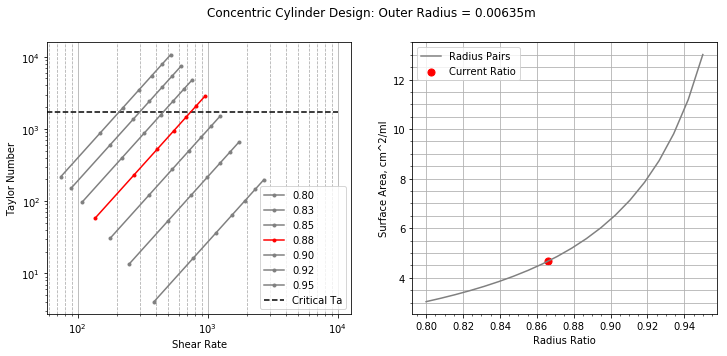

In [132]:
design_Plot([0.00635],ratios,velos,0.0055)

## The Biomaterial Phase Space
- Various tubing
- CPB Oxygenator
- Centrifugal pump 
- Dialysis
- ECMO Oxygenator
- LVAD 

In [4]:
surf_Tube(0.00315)

6.349206349206349